# import the needed liberaries

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer

import numpy as np
from sklearn.model_selection import train_test_split

# get the data set

In [38]:
df = pd.read_csv('healthcare_dataset.csv')

In [39]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,1/31/2024,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2/2/2024,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,8/20/2019,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,8/26/2019,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,9/22/2022,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,10/7/2022,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,11/18/2020,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,12/18/2020,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,9/19/2022,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,10/9/2022,Penicillin,Abnormal


## Identify missing values and deal with them

In [40]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

# Remove unneeded features

In [41]:
# Commented out features are the extracted ones
df = df.drop(columns=[
                      'Name', 
                      # 'Age',
                      # 'Gender',
                      # 'Blood Type',
                      # 'Medical Condition',
                      'Date of Admission',
                      'Doctor', 
                      'Hospital', 
                      'Insurance Provider',
                      'Billing Amount',
                      # 'Room Number', 
                      # 'Admission Type', 
                      'Discharge Date',
                      # 'Medication', 
                      ])

# Encode Catagorical Data

In [42]:
# Features and target
X = df.drop(columns=["Test Results"])
y = df["Test Results"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Encode X

In [43]:
# Identify columns
numeric_cols = [
  "Age", 
  # "Billing Amount",
  # "Room Number"
]
categorical_cols = X.columns.drop(numeric_cols).tolist()

# ColumnTransformer: correct encoding
ct = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(sparse_output=False, handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numeric_cols)
    ]
)

# Fit/transform
X_train_processed = ct.fit_transform(X_train)
X_test_processed = ct.transform(X_test)

#### Encode y

In [44]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Training The Linear Regression Model

Accuracy: 0.32585585585585586
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3754
           1       0.33      1.00      0.49      3617
           2       0.00      0.00      0.00      3729

    accuracy                           0.33     11100
   macro avg       0.11      0.33      0.16     11100
weighted avg       0.11      0.33      0.16     11100

Prediction range (before rounding):
Min: 0.6806334969829024 Max: 1.311065076330982


c:\Users\HP\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\HP\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\HP\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

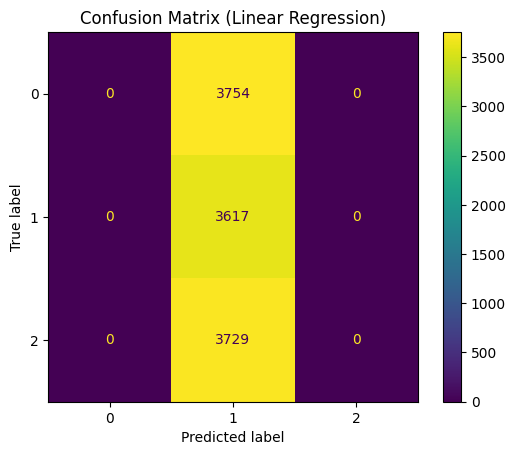

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import numpy as np

# Train
model = LinearRegression()
model.fit(X_train_processed, y_train_encoded)

# Predict (continuous)
y_pred_cont = model.predict(X_test_processed)

# Round to nearest class
y_pred = np.rint(y_pred_cont).astype(int)

# Accuracy & report
print("Accuracy:", accuracy_score(y_test_encoded, y_pred))
print(classification_report(y_test_encoded, y_pred))

# ---- Results range ----
print("Prediction range (before rounding):")
print("Min:", y_pred_cont.min(), "Max:", y_pred_cont.max())

# ---- Confusion Matrix ----
ConfusionMatrixDisplay.from_predictions(y_test_encoded, y_pred)
plt.title("Confusion Matrix (Linear Regression)")
plt.show()
